# Titanic Competition on Kaggle

### Import libraries 

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Getting a first impression of the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


sibsp: Number of Siblings/Spouses Aboard

parch: Number of Parents/Children Aboard


### Seperate the labels from the features

In [6]:
labels = train['Survived']

I am dropping some features, that are supposably not majorly important for the classifier.
You might get some use out of 'Name' or 'Embarked' but at this point I dont use them.

In [7]:
features = train.drop(['Cabin','Embarked','Name','Ticket','PassengerId','Survived'], axis = 1)

After dropping the features from above I have a second look on the data.

In [8]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


Every column except 'Sex' seems to have numerical values. We will change the 'male' to 0 and 'female' to 1, so we 
can train a DecisionTreeClassifier with it, since it can only compute numerical values.

In [9]:
features['Sex'] = features['Sex'].replace({'male': 0, 'female': 1})

In [10]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


That worked out. Next we are checking, if there are any NaN or infinity in our data.

In [11]:
print(np.isnan(features))
print(np.where(np.isnan(features)))

     Pclass    Sex    Age  SibSp  Parch   Fare
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
..      ...    ...    ...    ...    ...    ...
886   False  False  False  False  False  False
887   False  False  False  False  False  False
888   False  False   True  False  False  False
889   False  False  False  False  False  False
890   False  False  False  False  False  False

[891 rows x 6 columns]
(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367,

We observe that there are quite a few NaNs and since our classifier cannot compute those we
are going to replace them.

In [12]:
features = np.nan_to_num(features)

We can check, that this worked, by using the above method again.

In [13]:
print(np.where(np.isnan(features)))

(array([], dtype=int64), array([], dtype=int64))


Now our training data should be in good shape and we can train our classifier.

### Training our classifier
I am using a DecisionTreeClassifier for this example. 

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

It seems like the classifier was able to learn our data, so now i am making a first prediction with a single test 
passenger only. This Person was in passenger class 1, was female, was 39 years old, had 0 Siblings, Spouses, Parents or Children Aboard and paid a whopping fare of 108.9000 Pounds.

In [15]:
print(clf.predict([[1, 1, 39, 0, 0, 108.9000]]))

[1]


So for this person our classifier predicts that it had survived.

### Feed the classifier our test data
We are cleaning our test_data the same way we did with our training data. 
    1. We drop some columns
    2. We make sure every entry is numeric
    3. We make sure no entry is NaN or infinity

In [16]:
test_data = test.drop(['Cabin','Embarked','Name','Ticket','PassengerId'], axis = 1)
test_data['Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})
test_data = np.nan_to_num(test_data)

Check for NaNs

In [17]:
print(np.where(np.isnan(test_data)))

(array([], dtype=int64), array([], dtype=int64))


Since our data should be clean by now, I will feed it into our classifier.

In [18]:
prediction = clf.predict(test_data)

In [19]:
print(prediction)

[0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


So there we have it, a prediction for the passengers of our test data set, where '1' stands for survived and '0' for 
not survived.

#### Create a .csv file for submission to Kaggle

In [20]:
submission = zip(test['PassengerId'],prediction)
df = pd.DataFrame(data = submission, columns=['PassengerId','Survived'])
df.to_csv('gender_submission.csv',index=False,header=True)


### Data Visualization
#### Distribution according to passenger classes

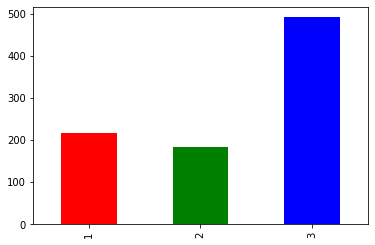

In [21]:
train['Pclass'].value_counts().sort_index().plot(kind = 'bar', color = ['r', 'g', 'b'])

#### Age Binnig in order to visualize age distribution in a better way

In [22]:
bins = [0, 10, 20, 30, 40, 50 ,60 ,70 ,80]
train['Agebin'] = pd.cut(train['Age'], bins)
train.Agebin

0      (20.0, 30.0]
1      (30.0, 40.0]
2      (20.0, 30.0]
3      (30.0, 40.0]
4      (30.0, 40.0]
           ...     
886    (20.0, 30.0]
887    (10.0, 20.0]
888             NaN
889    (20.0, 30.0]
890    (30.0, 40.0]
Name: Agebin, Length: 891, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

#### Passengers that survived

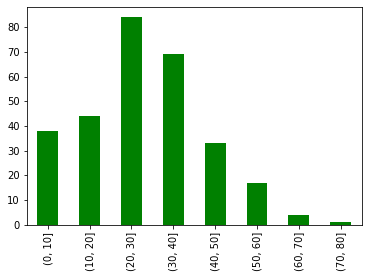

In [23]:
train[train['Survived'] == 1]['Agebin'].value_counts().sort_index().plot(kind = 'bar', color = 'g')

#### Passengers that did not survive

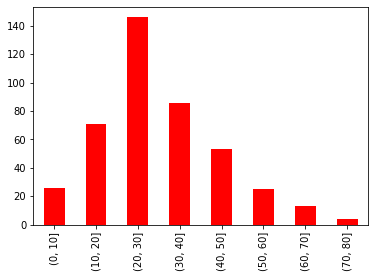

In [24]:
train[train['Survived'] == 0]['Agebin'].value_counts().sort_index().plot(kind = 'bar', color = 'r')

We can see that both distributions look kind of similar.

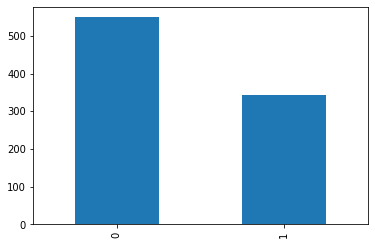

In [26]:
train['Survived'].value_counts().plot(kind = 'bar')

The diagram above shows, that more people have died than people who have survived.